<a href="https://colab.research.google.com/github/saeed-hmt/Machine-Learning/blob/main/classification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [1]:
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install uszipcode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn import preprocessing
from uszipcode import SearchEngine
from geopy.geocoders import Nominatim
from folium import Map, Marker
from folium.plugins import MarkerCluster

/usr/local/lib/python3.9/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## Import Dataset

In [4]:
# file_path = input('file path : ')
file_path = '/content/Bank_Personal_Loan_Modelling(1).csv'
data = pd.read_csv(file_path)
data.drop('ID', axis=1, inplace=True)

In [5]:
data

Age  Experience  Income  ZIP Code  Family CCAvg  Education  Mortgage  \
0      25           1      49     91107       4  1/60          1         0   
1      45          19      34     90089       3  1/50          1         0   
2      39          15      11     94720       1  1/00          1         0   
3      35           9     100     94112       1  2/70          2         0   
4      35           8      45     91330       4  1/00          2         0   
...   ...         ...     ...       ...     ...   ...        ...       ...   
4995   29           3      40     92697       1  1/90          3         0   
4996   30           4      15     92037       4  0/40          1        85   
4997   63          39      24     93023       2  0/30          3         0   
4998   65          40      49     90034       3  0/50          2         0   
4999   28           4      83     92612       3  0/80          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 13 columns]

## Data Preprocessing

In [6]:
data.describe()

Age   Experience       Income      ZIP Code       Family  \
count  5000.000000  5000.000000  5000.000000   5000.000000  5000.000000   
mean     45.338400    20.104600    73.774200  93152.503000     2.396400   
std      11.463166    11.467954    46.033729   2121.852197     1.147663   
min      23.000000    -3.000000     8.000000   9307.000000     1.000000   
25%      35.000000    10.000000    39.000000  91911.000000     1.000000   
50%      45.000000    20.000000    64.000000  93437.000000     2.000000   
75%      55.000000    30.000000    98.000000  94608.000000     3.000000   
max      67.000000    43.000000   224.000000  96651.000000     4.000000   

         Education     Mortgage  Personal Loan  Securities Account  \
count  5000.000000  5000.000000    5000.000000         5000.000000   
mean      1.881000    56.498800       0.096000            0.104400   
std       0.839869   101.713802       0.294621            0.305809   
min       1.000000     0.000000       0.000000            0.000000   
25%       1.000000     0.000000       0.000000            0.000000   
50%       2.000000     0.000000       0.000000            0.000000   
75%       3.000000   101.000000       0.000000            0.000000   
max       3.000000   635.000000       1.000000            1.000000   

       CD Account       Online   CreditCard  
count  5000.00000  5000.000000  5000.000000  
mean      0.06040     0.596800     0.294000  
std       0.23825     0.490589     0.455637  
min       0.00000     0.000000     0.000000  
25%       0.00000     0.000000     0.000000  
50%       0.00000     1.000000     0.000000  
75%       0.00000     1.000000     1.000000  
max       1.00000     1.000000     1.000000

There are some negative values for Experience column that it's not true.

In [7]:
data[data['Experience'] < 0]['Experience'].unique()

array([-1, -2, -3])

The negative values are between -1 and -3. I think they are just typo. Because if they were just -1 we could say that they are missing value. Let's try to absolutify them.

In [8]:
data['Experience'] = abs(data['Experience'])

In [9]:
data[data['Experience'] < 0]['Experience']

Series([], Name: Experience, dtype: int64)

In [10]:
data.describe()

Age   Experience       Income      ZIP Code       Family  \
count  5000.000000  5000.000000  5000.000000   5000.000000  5000.000000   
mean     45.338400    20.134600    73.774200  93152.503000     2.396400   
std      11.463166    11.415189    46.033729   2121.852197     1.147663   
min      23.000000     0.000000     8.000000   9307.000000     1.000000   
25%      35.000000    10.000000    39.000000  91911.000000     1.000000   
50%      45.000000    20.000000    64.000000  93437.000000     2.000000   
75%      55.000000    30.000000    98.000000  94608.000000     3.000000   
max      67.000000    43.000000   224.000000  96651.000000     4.000000   

         Education     Mortgage  Personal Loan  Securities Account  \
count  5000.000000  5000.000000    5000.000000         5000.000000   
mean      1.881000    56.498800       0.096000            0.104400   
std       0.839869   101.713802       0.294621            0.305809   
min       1.000000     0.000000       0.000000            0.000000   
25%       1.000000     0.000000       0.000000            0.000000   
50%       2.000000     0.000000       0.000000            0.000000   
75%       3.000000   101.000000       0.000000            0.000000   
max       3.000000   635.000000       1.000000            1.000000   

       CD Account       Online   CreditCard  
count  5000.00000  5000.000000  5000.000000  
mean      0.06040     0.596800     0.294000  
std       0.23825     0.490589     0.455637  
min       0.00000     0.000000     0.000000  
25%       0.00000     0.000000     0.000000  
50%       0.00000     1.000000     0.000000  
75%       0.00000     1.000000     1.000000  
max       1.00000     1.000000     1.000000

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 5000 non-null   int64 
 1   Experience          5000 non-null   int64 
 2   Income              5000 non-null   int64 
 3   ZIP Code            5000 non-null   int64 
 4   Family              5000 non-null   int64 
 5   CCAvg               5000 non-null   object
 6   Education           5000 non-null   int64 
 7   Mortgage            5000 non-null   int64 
 8   Personal Loan       5000 non-null   int64 
 9   Securities Account  5000 non-null   int64 
 10  CD Account          5000 non-null   int64 
 11  Online              5000 non-null   int64 
 12  CreditCard          5000 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 507.9+ KB


In [12]:
data['CCAvg'] = data['CCAvg'].str.replace('/', '.').astype(float)

In [13]:
data

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1      49     91107       4    1.6          1         0   
1      45          19      34     90089       3    1.5          1         0   
2      39          15      11     94720       1    1.0          1         0   
3      35           9     100     94112       1    2.7          2         0   
4      35           8      45     91330       4    1.0          2         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4995   29           3      40     92697       1    1.9          3         0   
4996   30           4      15     92037       4    0.4          1        85   
4997   63          39      24     93023       2    0.3          3         0   
4998   65          40      49     90034       3    0.5          2         0   
4999   28           4      83     92612       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 13 columns]

In [14]:
geolocator = Nominatim(user_agent="saeed")
search_engine = SearchEngine()

def get_location_geopy(zipcode):
    location = geolocator.geocode(zipcode, addressdetails=True)
    
    if location:
        county = location.raw['address'].get('county',
                                             location.raw['address'].get(
                                                 'state')
                                             )
        if county and location.latitude and location.longitude:
            return location.raw['address'].get(
                'country'), county, location.latitude, location.longitude
        else:
            return None
    else:
        return None

def get_location_uszipcode(zipcode):
    location = search_engine.by_zipcode(zipcode)
    if location:
      if location.lat and location.lng:
          return 'United States', location.county, location.lat, location.lng
    else:
        return None

def get_address(zipcode):
    location_uszipcode = get_location_uszipcode(zipcode)
    
    if location_uszipcode:
        return location_uszipcode
    else:
        location_geopy = get_location_geopy(zipcode)
        if location_geopy:
            return location_geopy
        else:
            return None


data[['Country',
      'County or State',
      'Latitude',
      'Longitude']] = data['ZIP Code'].apply(get_address).apply(pd.Series)

In [15]:
data.head()

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   25           1      49     91107       4    1.6          1         0   
1   45          19      34     90089       3    1.5          1         0   
2   39          15      11     94720       1    1.0          1         0   
3   35           9     100     94112       1    2.7          2         0   
4   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

         Country       County or State  Latitude  Longitude  
0  United States    Los Angeles County     34.16    -118.08  
1  United States    Los Angeles County     34.02    -118.29  
2  United States        Alameda County     37.87    -122.25  
3  United States  San Francisco County     37.72    -122.44  
4  United States    Los Angeles County     34.25    -118.53

### Check Missing value

In [16]:
data.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Country               0
County or State       0
Latitude              0
Longitude             0
dtype: int64

No missing value for columns.

### Check noise

#### Age

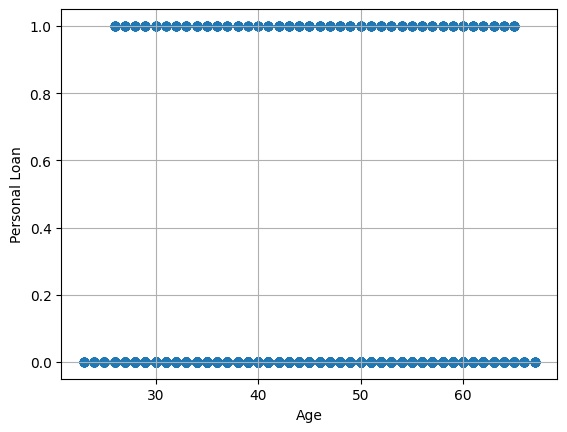

In [17]:
plt.scatter(data['Age'], data['Personal Loan'])
plt.grid()
plt.xlabel('Age')
plt.ylabel('Personal Loan')
plt.show()

#### Experience

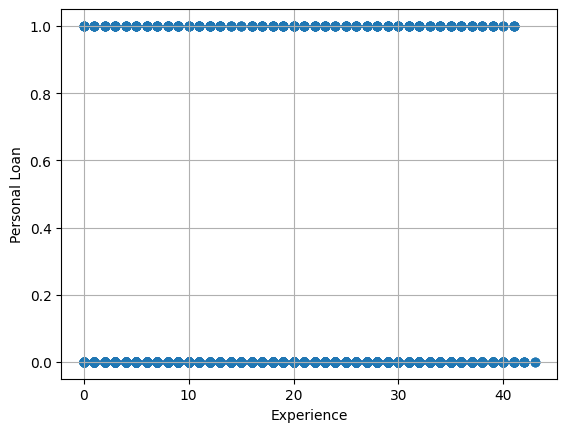

In [18]:
plt.scatter(data['Experience'], data['Personal Loan'])
plt.grid()
plt.xlabel('Experience')
plt.ylabel('Personal Loan')
plt.show()

Let's check value of Experience column with respect to Age column.

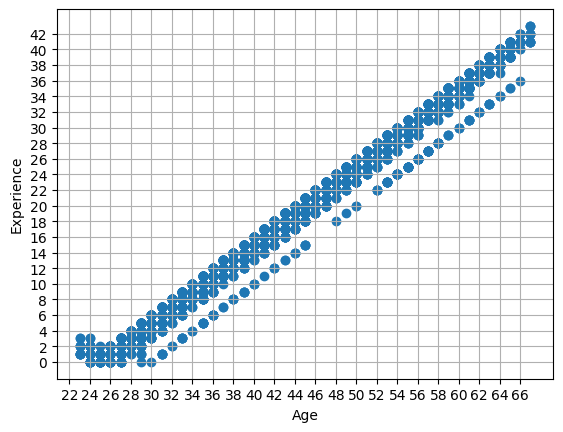

In [19]:
plt.scatter(data['Age'], data['Experience'])
plt.grid()
plt.xlabel('Age')
plt.ylabel('Experience')
plt.xticks(ticks=range(np.min(data['Age']) -1, np.max(data['Age']) + 1, 2))
plt.yticks(ticks=range(np.min(data['Experience']),
                       np.max(data['Experience']) + 1, 2))
plt.show()

As we can see values of Experience with respect to Age are reasonable.

#### Income

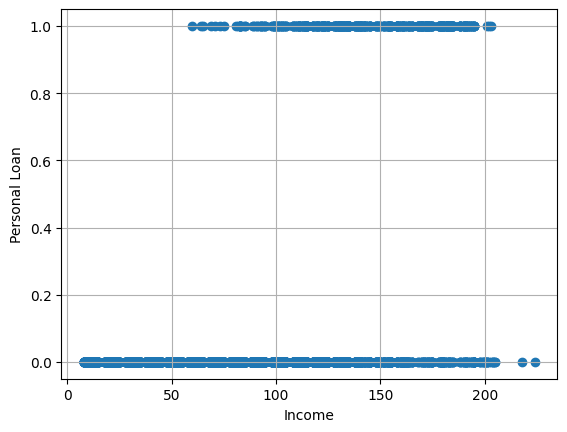

In [20]:
plt.scatter(data['Income'], data['Personal Loan'])
plt.grid()
plt.xlabel('Income')
plt.ylabel('Personal Loan')
plt.show()

#### Family

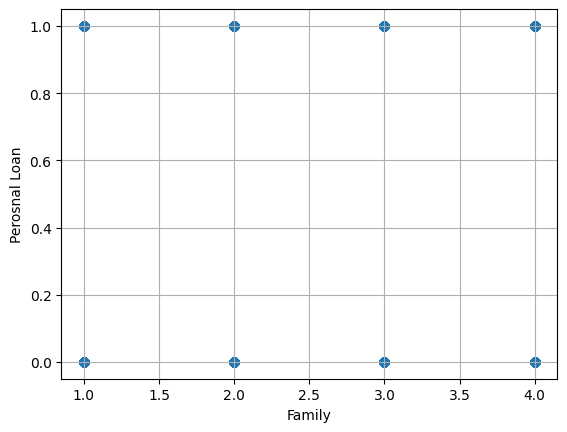

In [21]:
plt.scatter(data['Family'], data['Personal Loan'])
plt.grid()
plt.xlabel('Family')
plt.ylabel('Perosnal Loan')
plt.show()

#### CCAvg

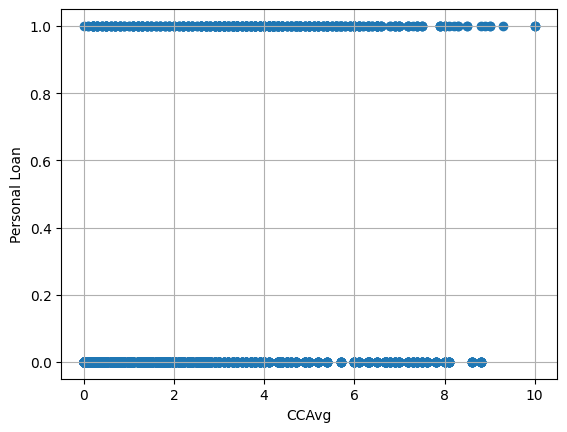

In [22]:
plt.scatter(data['CCAvg'], data['Personal Loan'])
plt.grid()
plt.xlabel('CCAvg')
plt.ylabel('Personal Loan')
plt.show()

#### Education

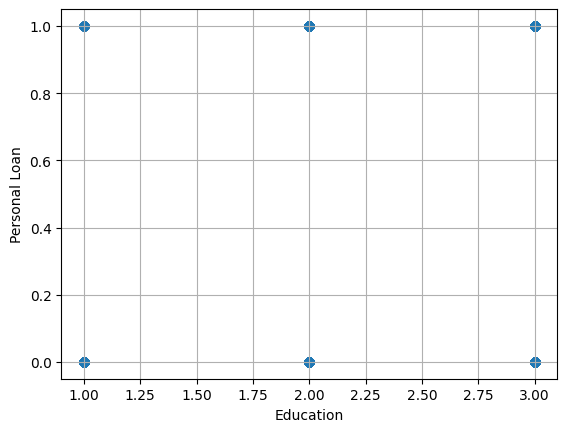

In [23]:
plt.scatter(data['Education'], data['Personal Loan'])
plt.grid()
plt.xlabel('Education')
plt.ylabel('Personal Loan')
plt.show()

#### Mortgage

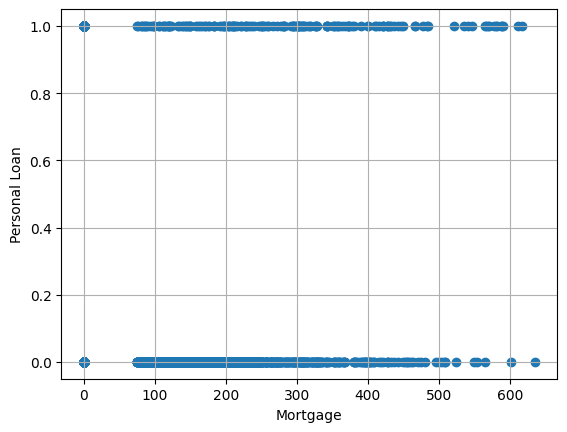

In [24]:
plt.scatter(data['Mortgage'], data['Personal Loan'])
plt.grid()
plt.xlabel('Mortgage')
plt.ylabel('Personal Loan')
plt.show()

#### Securities Account

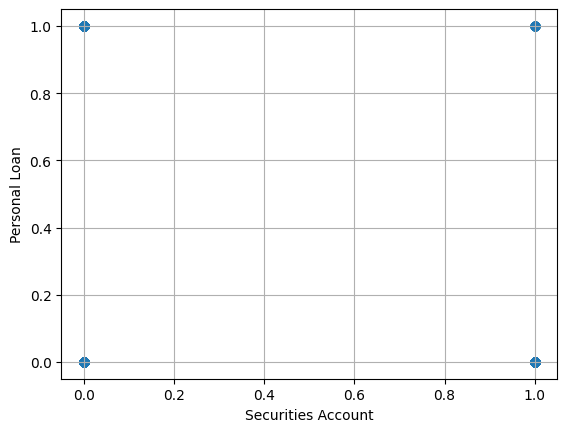

In [25]:
plt.scatter(data['Securities Account'], data['Personal Loan'])
plt.grid()
plt.xlabel('Securities Account')
plt.ylabel('Personal Loan')
plt.show()

#### CD Account

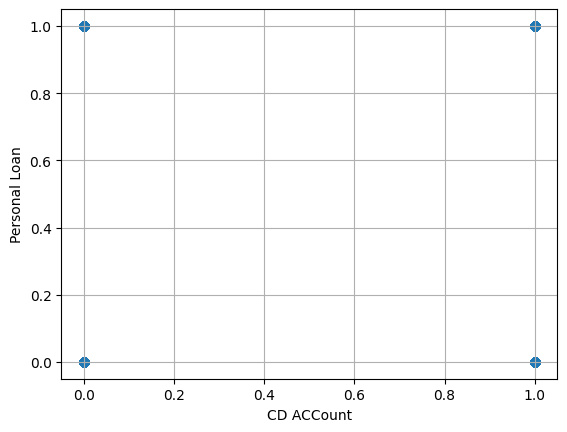

In [26]:
plt.scatter(data['CD Account'], data['Personal Loan'])
plt.grid()
plt.xlabel('CD ACCount')
plt.ylabel('Personal Loan')
plt.show()

#### Online

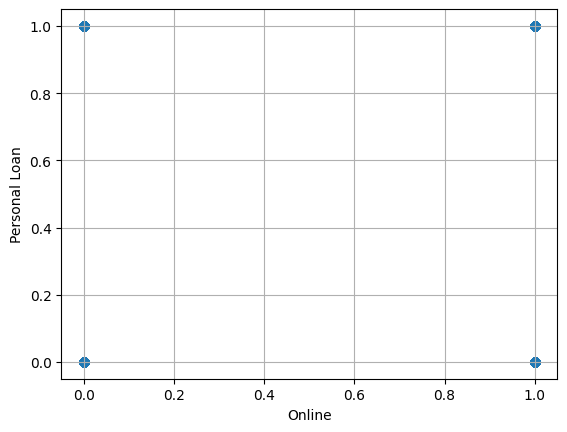

In [27]:
plt.scatter(data['Online'], data['Personal Loan'])
plt.grid()
plt.xlabel('Online')
plt.ylabel('Personal Loan')
plt.show()

#### CreditCard

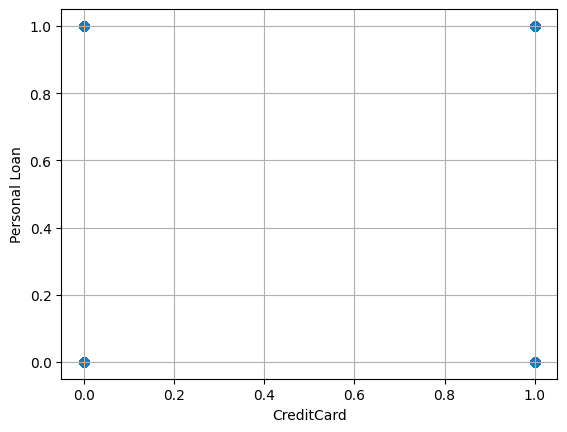

In [28]:
plt.scatter(data['CreditCard'], data['Personal Loan'])
plt.grid()
plt.xlabel('CreditCard')
plt.ylabel('Personal Loan')
plt.show()


---


**As we can see above, none of the columns has noise.**

### Analyze more

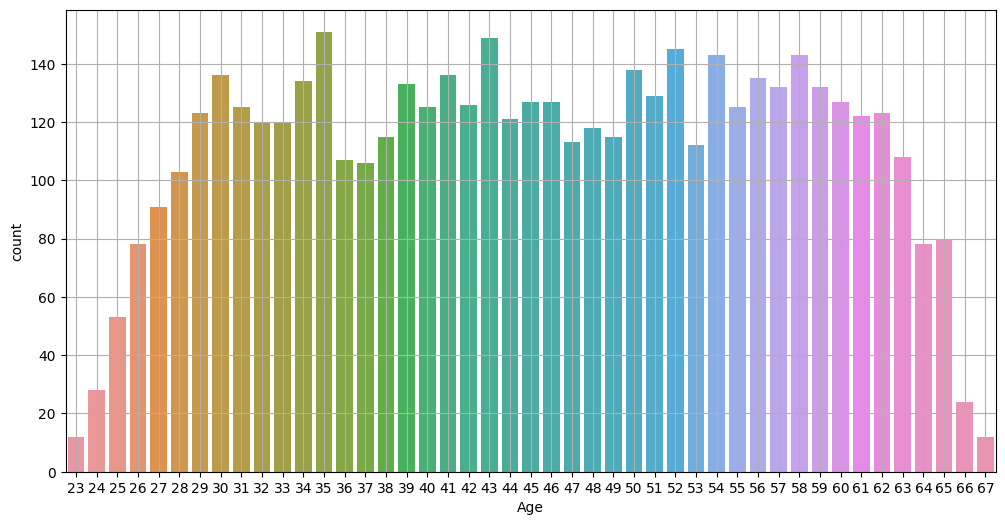

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x=data['Age'])
plt.grid()
plt.xlabel('Age')
plt.show()

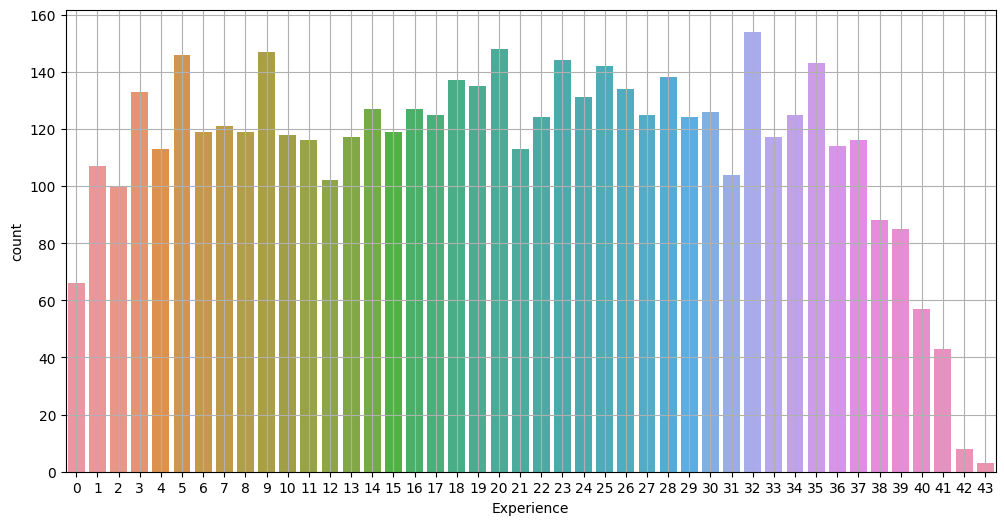

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x=data['Experience'])
plt.grid()
plt.xlabel('Experience')
plt.show()

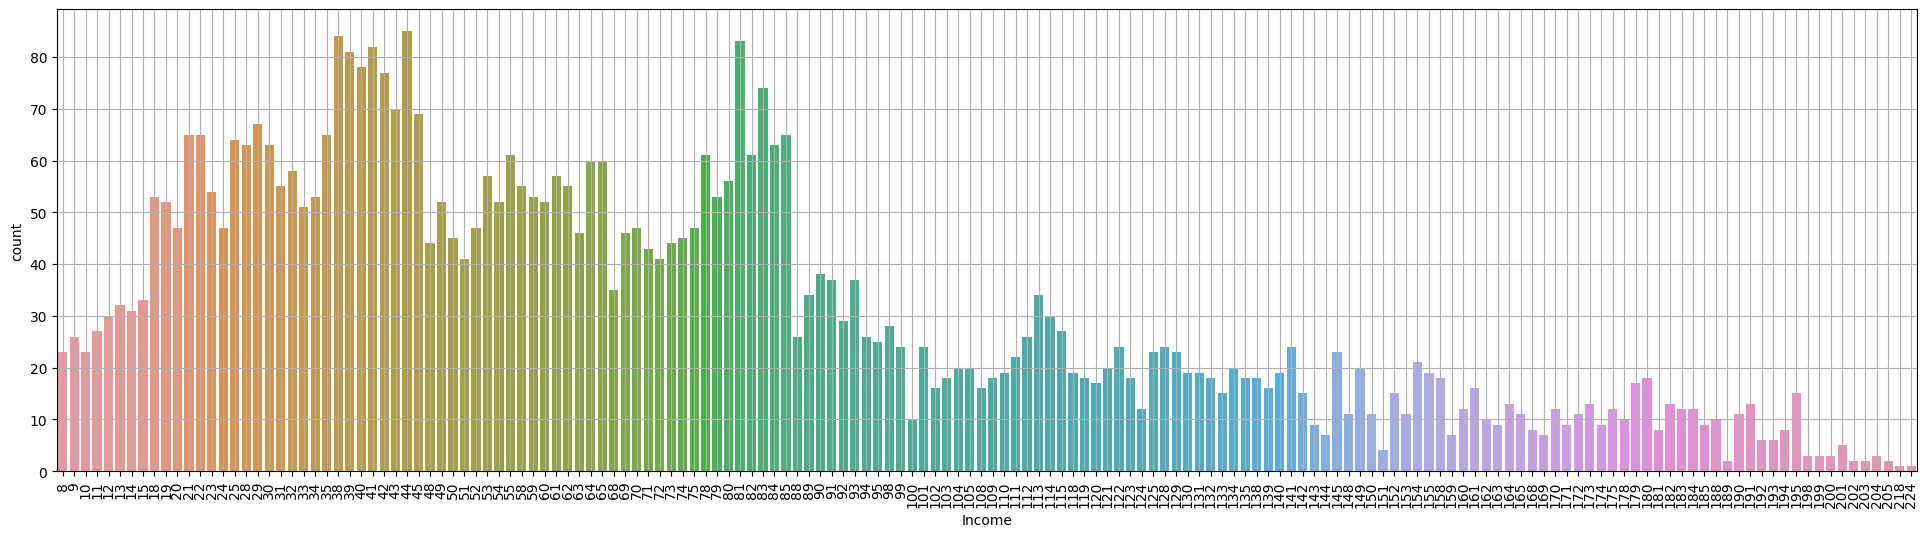

In [31]:
plt.figure(figsize=(24, 6))
sns.countplot(data=data, x=data['Income'])
plt.grid()
plt.xlabel('Income')
plt.xticks(rotation=90)
plt.show()

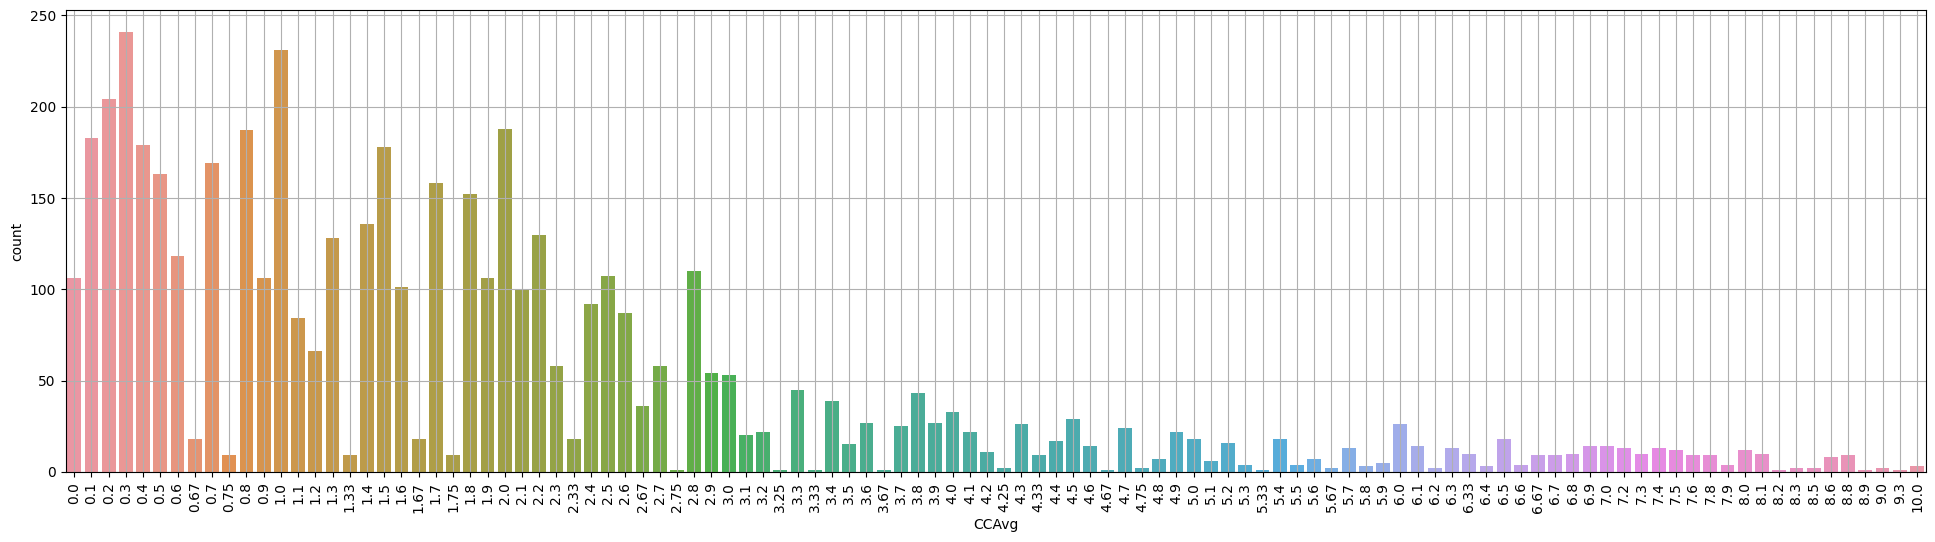

In [32]:
plt.figure(figsize=(24, 6))
sns.countplot(data=data, x='CCAvg')
plt.grid()
plt.xlabel('CCAvg')
plt.xticks(rotation=90)
plt.show()

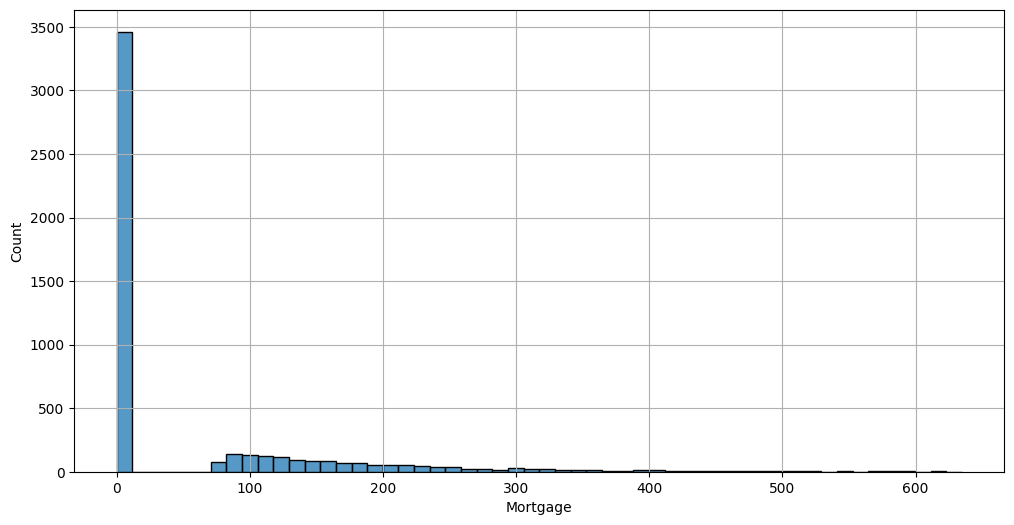

In [33]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Mortgage')
plt.grid()
plt.xlabel('Mortgage')
plt.show()

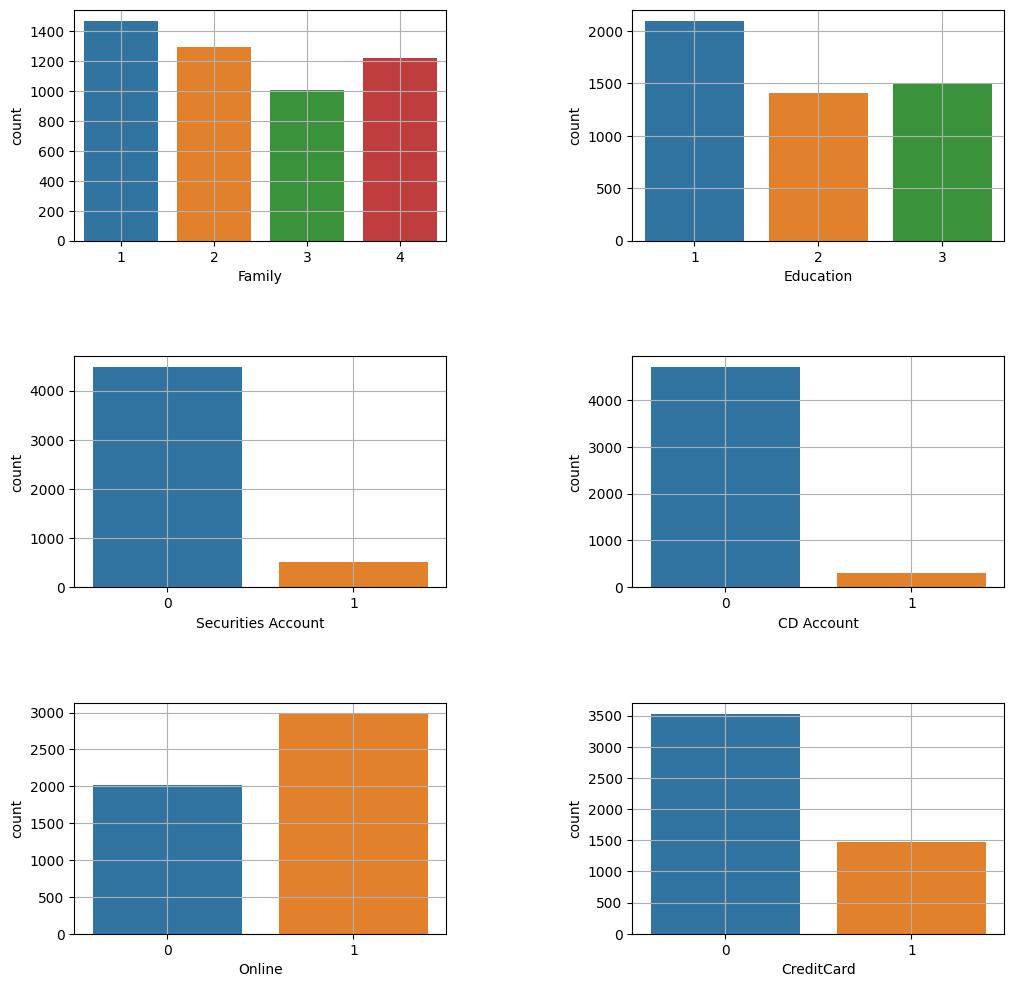

In [34]:
category_columns = ['Family', 'Education', 'Securities Account',
                    'CD Account', 'Online', 'CreditCard']

fig, axs = plt.subplots(3, 2, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for i, category in enumerate(category_columns):
    ax = axs.flatten()[i]
    sns.countplot(data=data, x=data[category], ax=ax)
    ax.set_xlabel(category)
    ax.grid()
plt.show()

<ipython-input-35-0d107ced18db>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

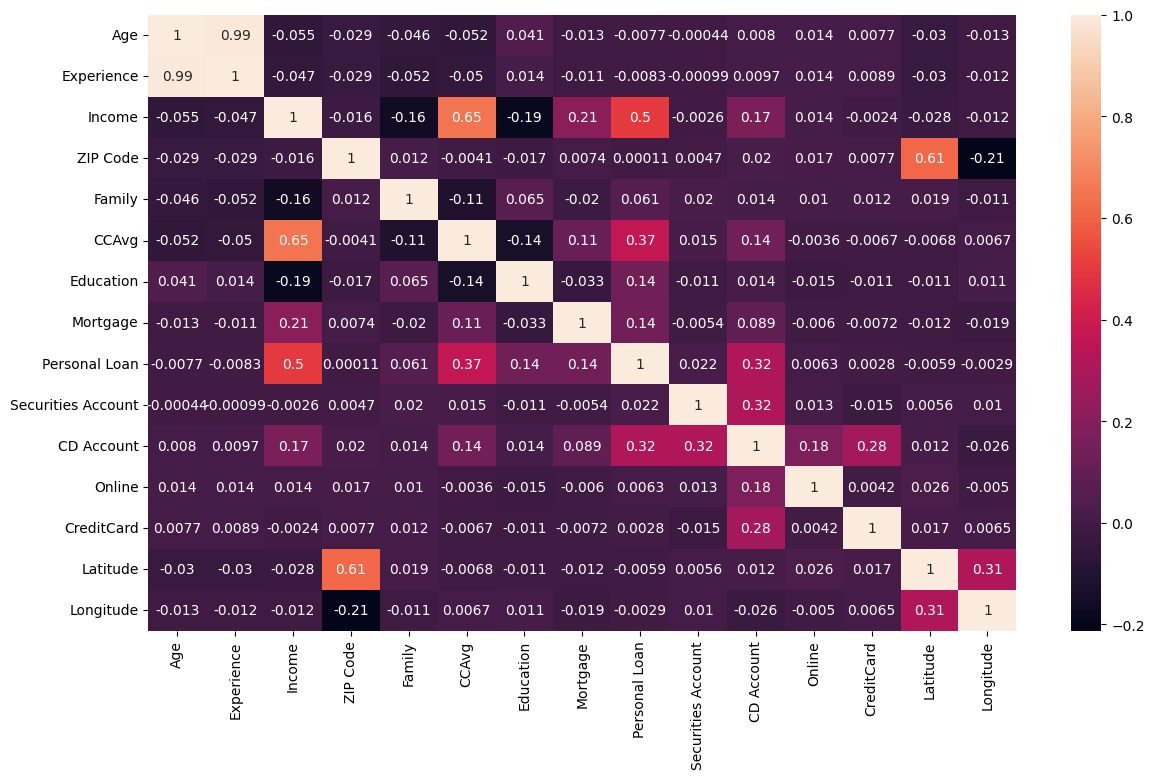

In [35]:
plt.figure(figsize=(14, 8))
sns.heatmap(data.corr(), annot=True)

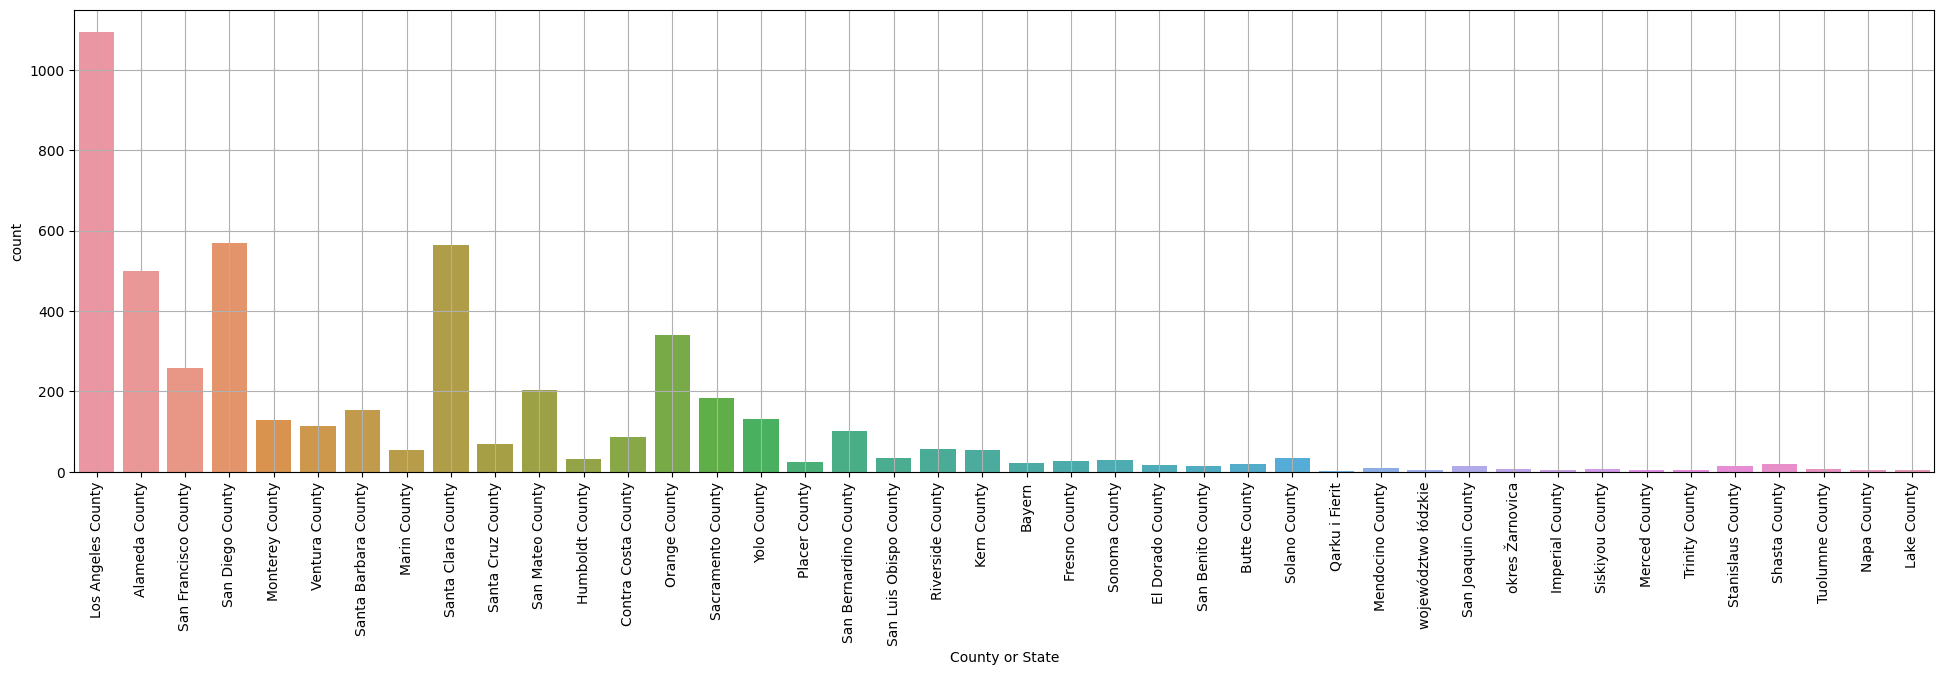

In [36]:
plt.figure(figsize=(24, 6))
sns.countplot(data=data, x='County or State')
plt.grid()
plt.xlabel('County or State')
plt.xticks(rotation=90)
plt.show()

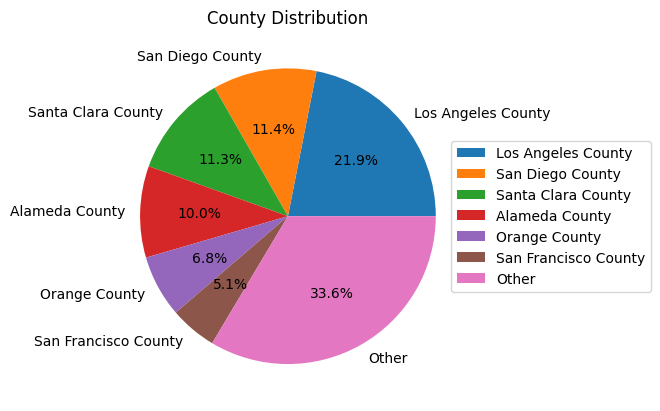

In [37]:
county_counts = data['County or State'].value_counts()
top_counties = county_counts[:6]
other_counties = county_counts[6:].sum()
county_data = pd.concat([top_counties, pd.Series({'Other': other_counties})])
county_labels = county_data.index.tolist()
county_values = county_data.tolist()

fig, ax = plt.subplots()
ax.pie(county_values, labels=county_labels, autopct='%1.1f%%')
ax.set_title('County Distribution')

ax.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))
plt.show()


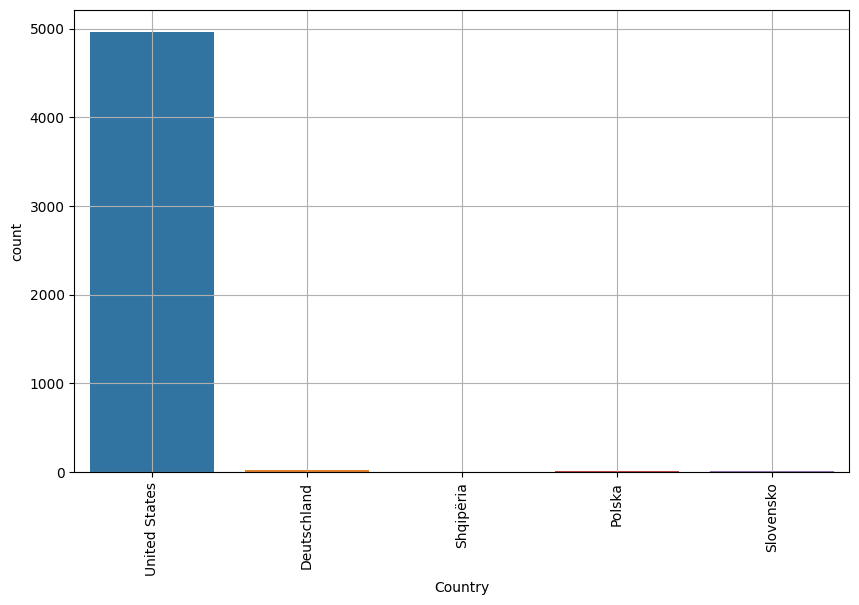

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Country')
plt.grid()
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()

In [39]:
map = Map(location=[34.154063, -118.086059], zoom_start=5)
marker_cluster = MarkerCluster().add_to(map)

for index, row  in data.iterrows():
    Marker(location=[row['Latitude'], row['Longitude']],
           popup=row['ZIP Code']).add_to(marker_cluster)
map

As we can see there are 34 rows out of United States.

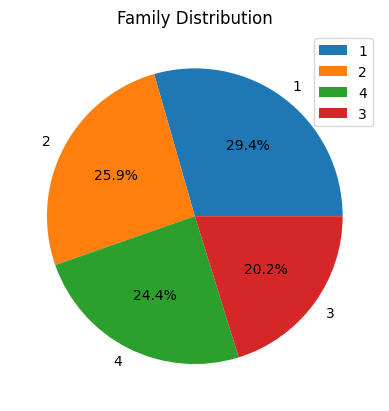

In [40]:
plt.pie(
    x=data['Family'].value_counts(),
    labels=data['Family'].value_counts().index,
    autopct='%1.1f%%'
)
plt.legend()
plt.title('Family Distribution')
plt.show()

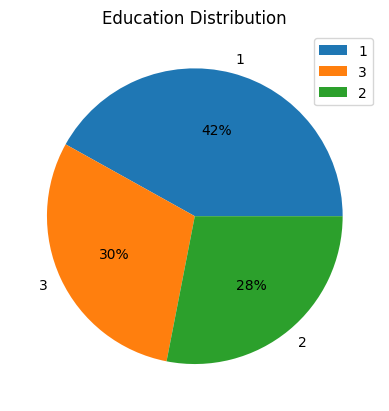

In [41]:
plt.pie(
    x=data['Education'].value_counts(),
    labels=data['Education'].value_counts().index,
    autopct='%.0f%%'
)
plt.legend()
plt.title('Education Distribution')
plt.show()

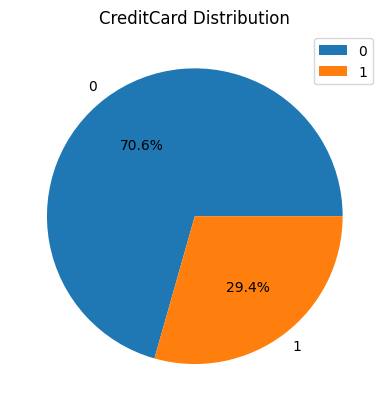

In [42]:
plt.pie(
    x=data['CreditCard'].value_counts(),
    labels=data['CreditCard'].value_counts().index,
    autopct='%1.1f%%'
)
plt.legend()
plt.title('CreditCard Distribution')
plt.show()

### Explore accepted Personal Loans

In [43]:
accepted_loans = data[data['Personal Loan'] == 1]
accepted_loans

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
9      34           9     180     93023       1    8.9          3         0   
16     38          14     130     95010       4    4.7          3       134   
18     46          21     193     91604       2    8.1          3         0   
29     38          13     119     94104       1    3.3          2         0   
38     42          18     141     94114       3    5.0          3         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4883   38          13     129     92646       3    4.1          3         0   
4927   43          19     121     94720       1    0.7          2         0   
4941   28           4     112     90049       2    1.6          2         0   
4962   46          20     122     90065       3    3.0          3         0   
4980   29           5     135     95762       3    5.3          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  \
9                 1                   0           0       0           0   
16                1                   0           0       0           0   
18                1                   0           0       0           0   
29                1                   0           1       1           1   
38                1                   1           1       1           0   
...             ...                 ...         ...     ...         ...   
4883              1                   0           1       1           1   
4927              1                   0           1       1           1   
4941              1                   0           0       1           0   
4962              1                   0           1       1           1   
4980              1                   0           1       1           1   

            Country       County or State  Latitude  Longitude  
9     United States        Ventura County     34.51    -119.29  
16    United States     Santa Cruz County     36.97    -121.95  
18    United States    Los Angeles County     34.13    -118.39  
29    United States  San Francisco County     37.79    -122.40  
38    United States  San Francisco County     37.75    -122.43  
...             ...                   ...       ...        ...  
4883  United States         Orange County     33.66    -117.97  
4927  United States        Alameda County     37.87    -122.25  
4941  United States    Los Angeles County     34.08    -118.49  
4962  United States    Los Angeles County     34.10    -118.22  
4980  United States      El Dorado County     38.68    -121.05  

[480 rows x 17 columns]

Let's Check percentage of each Education class that accept the personal Loan:

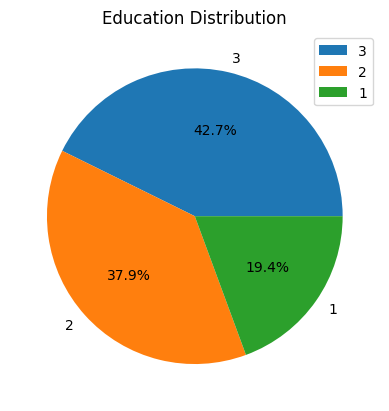

In [44]:
plt.pie(
    x=accepted_loans['Education'].value_counts(),
    labels=accepted_loans['Education'].value_counts().index,
    autopct='%1.1f%%'
)
plt.legend()
plt.title('Education Distribution')
plt.show()

We can see that the more education customer has, the more he accepts the personal loan.



---


Now let's check size of families that accept the personal loan.

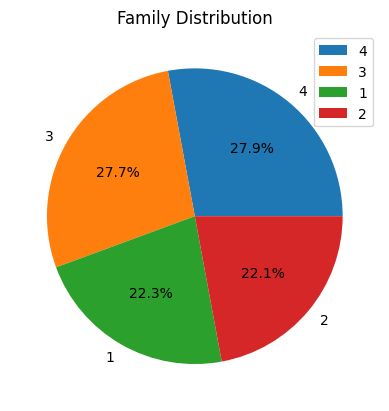

In [45]:
plt.pie(
    x=accepted_loans['Family'].value_counts(),
    labels=accepted_loans['Family'].value_counts().index,
    autopct='%1.1f%%'
)
plt.legend()
plt.title('Family Distribution')
plt.show()

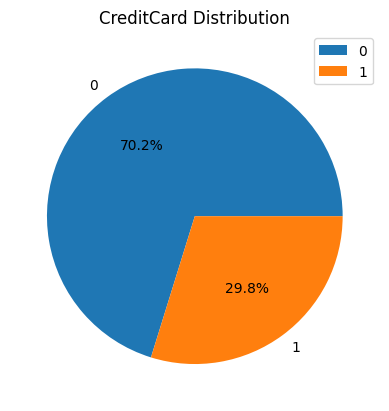

In [46]:
plt.pie(
    x=accepted_loans['CreditCard'].value_counts(),
    labels=accepted_loans['CreditCard'].value_counts().index,
    autopct='%1.1f%%'
)
plt.legend()
plt.title('CreditCard Distribution')
plt.show()

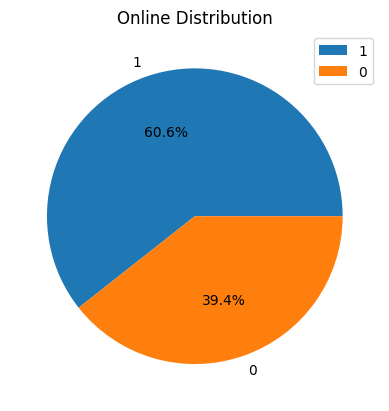

In [47]:
plt.pie(
    x=accepted_loans['Online'].value_counts(),
    labels=accepted_loans['Online'].value_counts().index,
    autopct='%1.1f%%'
)
plt.legend()
plt.title('Online Distribution')
plt.show()

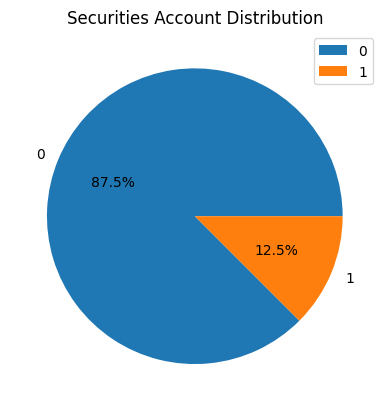

In [48]:
plt.pie(
    x=accepted_loans['Securities Account'].value_counts(),
    labels=accepted_loans['Securities Account'].value_counts().index,
    autopct='%1.1f%%'
)
plt.legend()
plt.title('Securities Account Distribution')
plt.show()

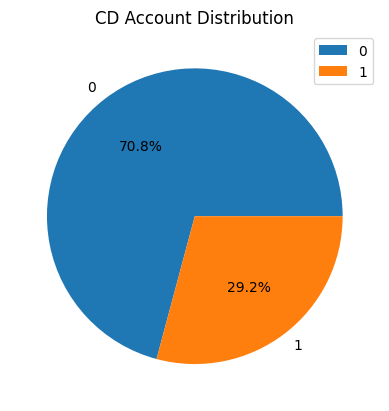

In [49]:
plt.pie(
    x=accepted_loans['CD Account'].value_counts(),
    labels=accepted_loans['CD Account'].value_counts().index,
    autopct='%1.1f%%'
)
plt.legend()
plt.title('CD Account Distribution')
plt.show()

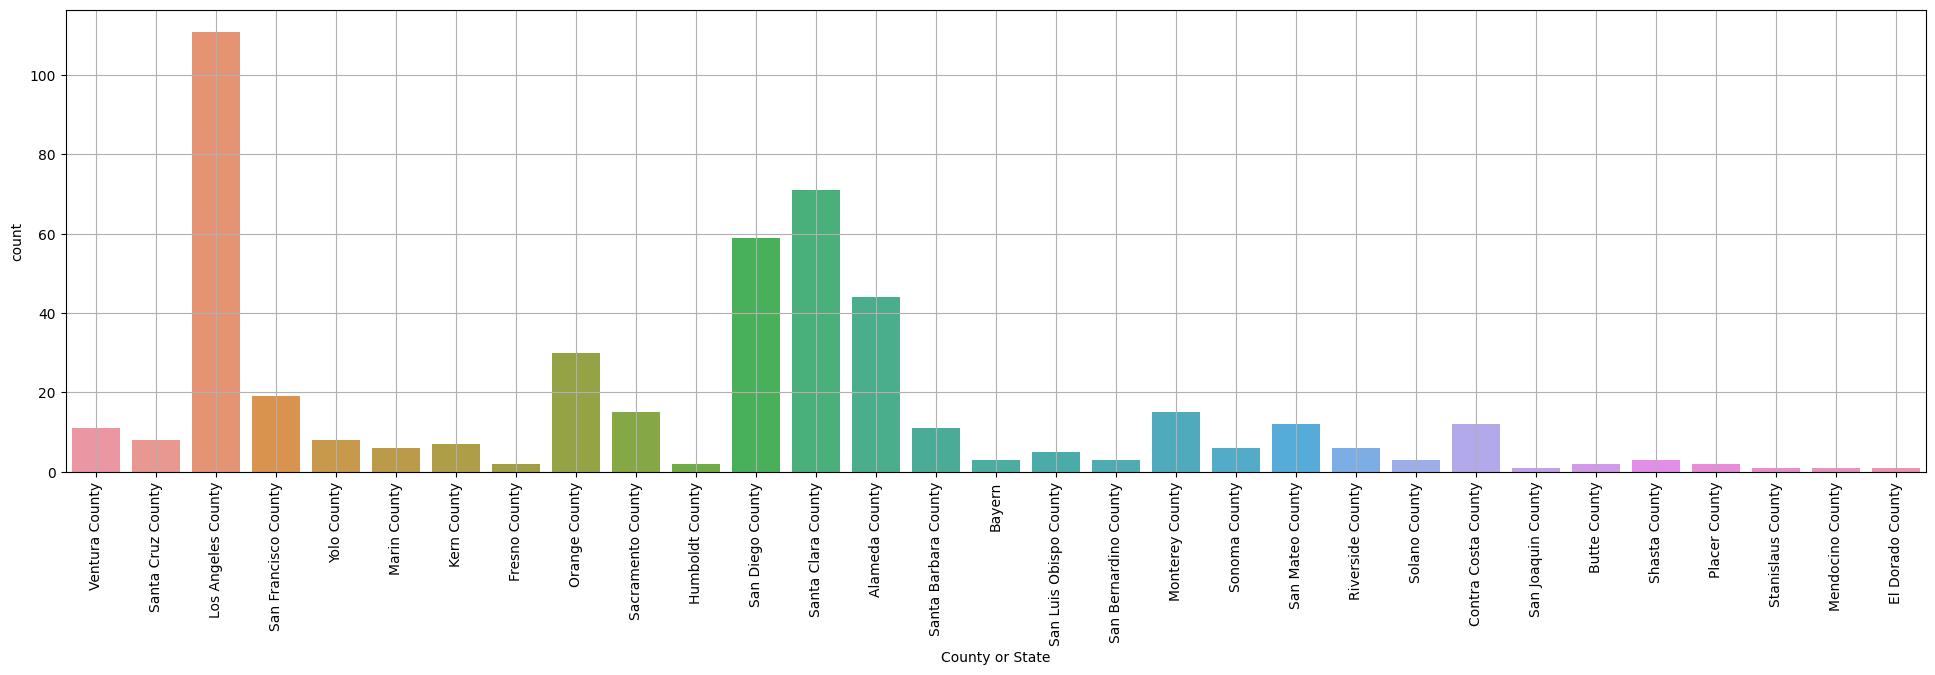

In [50]:
plt.figure(figsize=(24, 6))
sns.countplot(data=accepted_loans, x='County or State')
plt.grid()
plt.xlabel('County or State')
plt.xticks(rotation=90)
plt.show()

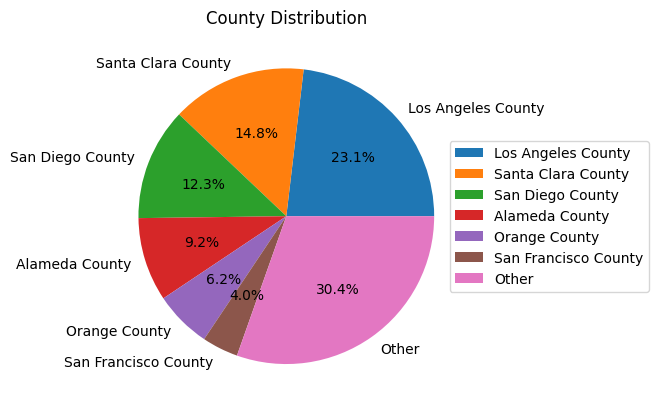

In [51]:
county_counts_accepted = accepted_loans['County or State'].value_counts()
top_counties_accepted = county_counts_accepted[:6]
other_counties_accepted = county_counts_accepted[6:].sum()
county_accepted_loans = pd.concat([top_counties_accepted, pd.Series(
    {'Other': other_counties_accepted}
    )
])
county_labels_accepted = county_accepted_loans.index.tolist()
county_values_accepted = county_accepted_loans.tolist()

fig, ax = plt.subplots()
ax.pie(county_values_accepted, labels=county_labels_accepted, autopct='%1.1f%%')
ax.set_title('County Distribution')

ax.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))
plt.show()

## Prepare data for models

In [52]:
county_encoder = {}
county_uniques = data['County or State'].unique()
for i in range(2, len(county_uniques) + 2):
    county_encoder[county_uniques[i - 2]] = i

county_encoder
encoded_data = data.replace({'County or State' : county_encoder})
encoded_data

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1      49     91107       4    1.6          1         0   
1      45          19      34     90089       3    1.5          1         0   
2      39          15      11     94720       1    1.0          1         0   
3      35           9     100     94112       1    2.7          2         0   
4      35           8      45     91330       4    1.0          2         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4995   29           3      40     92697       1    1.9          3         0   
4996   30           4      15     92037       4    0.4          1        85   
4997   63          39      24     93023       2    0.3          3         0   
4998   65          40      49     90034       3    0.5          2         0   
4999   28           4      83     92612       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  \
0                 0                   1           0       0           0   
1                 0                   1           0       0           0   
2                 0                   0           0       0           0   
3                 0                   0           0       0           0   
4                 0                   0           0       0           1   
...             ...                 ...         ...     ...         ...   
4995              0                   0           0       1           0   
4996              0                   0           0       1           0   
4997              0                   0           0       0           0   
4998              0                   0           0       1           0   
4999              0                   0           0       1           1   

            Country  County or State  Latitude  Longitude  
0     United States                2     34.16    -118.08  
1     United States                2     34.02    -118.29  
2     United States                3     37.87    -122.25  
3     United States                4     37.72    -122.44  
4     United States                2     34.25    -118.53  
...             ...              ...       ...        ...  
4995  United States               15     33.64    -117.84  
4996  United States                5     32.86    -117.24  
4997  United States                7     34.51    -119.29  
4998  United States                2     34.03    -118.40  
4999  United States               15     33.66    -117.83  

[5000 rows x 17 columns]

In [53]:
x = pd.DataFrame(encoded_data).drop(
    ['Personal Loan', 'ZIP Code', 'Latitude', 'Longitude', 'Country'],
    axis=1
).values
y = data['Personal Loan'].values

In [54]:
def min_max_scaler(x):
    scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    x_normalized = scaler.fit_transform(x)
    return x_normalized

x_normalized = min_max_scaler(x)

In [55]:
x_train, x_test, y_train, y_test = train_test_split(
    x_normalized,
    y,
    test_size=0.2,
    random_state=42
)

## Logistic Regression

In [56]:
log_clf = LogisticRegression(solver = 'liblinear')
log_clf.fit(x_train, y_train.ravel())
y_pred_log = log_clf.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred_log))

0.952


In [57]:
print(metrics.classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       895
           1       0.91      0.60      0.72       105

    accuracy                           0.95      1000
   macro avg       0.93      0.80      0.85      1000
weighted avg       0.95      0.95      0.95      1000



In [58]:
metrics.confusion_matrix(y_test, y_pred_log)

array([[889,   6],
       [ 42,  63]])

### Add Deimension to features

In [59]:
def add_dimension(data, d=2):
    score = 0.952
    columns = []
    scores = []
    df = pd.DataFrame(data).drop(
        ['Personal Loan', 'ZIP Code', 'Latitude', 'Longitude', 'Country'],
        axis=1
    )
    for col in df.columns:
        df[f'{col} ** {d}'] = df[col] ** d
        x = df.values
        y = data['Personal Loan'].values
        x_normalized = min_max_scaler(x)
        x_train, x_test, y_train, y_test = train_test_split(
            x_normalized,
            y,
            test_size=0.2,
            random_state=42
        )

        log_clf = LogisticRegression(
            solver='liblinear'
        )
        log_clf.fit(x_train, y_train)
        y_pred = log_clf.predict(x_test)
        log_score = metrics.accuracy_score(y_test, y_pred)
        if log_score > score:
            columns.append(f'{col} ** {d}')
            scores.append(log_score)
            score = log_score
        else:
            df.drop([f'{col} ** {d}'], axis=1, inplace=True)

    score_col_df = pd.DataFrame({
        'Columns' : columns,
        'Scores' : scores
    })
    return score_col_df, df

scores, df_add_dim_log = add_dimension(encoded_data, 2)

In [60]:
scores

Columns  Scores
0  Education ** 2   0.954

In [61]:
df_add_dim_log

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1      49       4    1.6          1         0   
1      45          19      34       3    1.5          1         0   
2      39          15      11       1    1.0          1         0   
3      35           9     100       1    2.7          2         0   
4      35           8      45       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3      40       1    1.9          3         0   
4996   30           4      15       4    0.4          1        85   
4997   63          39      24       2    0.3          3         0   
4998   65          40      49       3    0.5          2         0   
4999   28           4      83       3    0.8          1         0   

      Securities Account  CD Account  Online  CreditCard  County or State  \
0                      1           0       0           0                2   
1                      1           0       0           0                2   
2                      0           0       0           0                3   
3                      0           0       0           0                4   
4                      0           0       0           1                2   
...                  ...         ...     ...         ...              ...   
4995                   0           0       1           0               15   
4996                   0           0       1           0                5   
4997                   0           0       0           0                7   
4998                   0           0       1           0                2   
4999                   0           0       1           1               15   

      Education ** 2  
0                  1  
1                  1  
2                  1  
3                  4  
4                  4  
...              ...  
4995               9  
4996               1  
4997               9  
4998               4  
4999               1  

[5000 rows x 13 columns]

We can see that by adding column `Education ** 2` the score has increased 0.2% .


### `GridSearchCV` for Logistic Regression




---


Now let's test logistic regressin with GridSearchCV:


---


In [62]:
x_add_dim_log = df_add_dim_log.values
x_add_dim_log_normalized = min_max_scaler(x_add_dim_log)
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(
    x_add_dim_log_normalized,
    y,
    test_size=0.2,
    random_state=42
)

In [63]:
param_grid_log_reg = {
    'solver' : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    'penalty' : ['l1', 'l2', 'elasticnet', None],
    'C' : range(1, 11)
}
grid_search_log_reg = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid_log_reg,
    scoring='accuracy',
    cv=5,
    verbose=0
)
grid_search_log_reg.fit(x_train_log, y_train_log.ravel())

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': range(1, 11),
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')




---


The reason of warnings is because some combination of logistic regression arguments are not possible.


---





In [64]:
best_params_log = grid_search_log_reg.best_params_
best_params_log

{'C': 3, 'penalty': 'l1', 'solver': 'saga'}

now let's check logistic regression with these parameters:

In [65]:
modified_log_clf = LogisticRegression(
    C=best_params_log.get('C'),
    penalty=best_params_log.get('penalty'),
    solver=best_params_log.get('solver')
)
modified_log_clf.fit(x_train_log, y_train_log.ravel())
y_pred_modified_log = modified_log_clf.predict(x_test_log)
modified_log_score = metrics.accuracy_score(y_test_log, y_pred_modified_log)
modified_log_score

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.967

In [66]:
print(metrics.classification_report(y_test_log, y_pred_modified_log))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       895
           1       0.91      0.76      0.83       105

    accuracy                           0.97      1000
   macro avg       0.94      0.88      0.91      1000
weighted avg       0.97      0.97      0.97      1000



In [67]:
metrics.confusion_matrix(y_test_log, y_pred_modified_log)

array([[887,   8],
       [ 25,  80]])

We can see that by using best parameters and adding new columns, the score has increased about 1.5%.

## Naive Bayes

### Gaussian Naive Bayes

In [68]:
gnb_clf = GaussianNB()
gnb_clf.fit(x_train, y_train.ravel())
y_pred_gnb = gnb_clf.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred_gnb))

0.894


In [69]:
print(metrics.classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       895
           1       0.50      0.61      0.55       105

    accuracy                           0.89      1000
   macro avg       0.72      0.77      0.74      1000
weighted avg       0.90      0.89      0.90      1000



In [70]:
metrics.confusion_matrix(y_test, y_pred_gnb)

array([[830,  65],
       [ 41,  64]])

### Add dimension to features

In [71]:
def add_dimension_gnb(data, d=2):
    score = 0.894
    columns = []
    scores = []
    df = pd.DataFrame(data).drop(
        ['Personal Loan', 'ZIP Code', 'Latitude', 'Longitude', 'Country'],
        axis=1
    )
    for col in df.columns:
        df[f'{col} ** {d}'] = df[col] ** d
        x = df.values
        y = data['Personal Loan'].values
        x_normalized = min_max_scaler(x)
        x_train, x_test, y_train, y_test = train_test_split(
            x_normalized,
            y,
            test_size=0.2,
            random_state=42
        )

        gnb_clf = GaussianNB()
        gnb_clf.fit(x_train, y_train.ravel())
        y_pred_gnb = gnb_clf.predict(x_test)
        gnb_score = metrics.accuracy_score(y_test, y_pred_gnb)
        if gnb_score > score:
            columns.append(f'{col} ** {d}')
            scores.append(gnb_score)
            score = gnb_score
        else:
            df.drop([f'{col} ** {d}'], axis=1, inplace=True)

    score_col_df = pd.DataFrame({
        'Columns' : columns,
        'Scores' : scores
    })
    return score_col_df, df

scores_df_gnb, df_add_dim_gnb = add_dimension_gnb(encoded_data, 2)

In [72]:
scores_df_gnb

Columns  Scores
0  Income ** 2   0.900
1  Family ** 2   0.906

In [73]:
df_add_dim_gnb

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1      49       4    1.6          1         0   
1      45          19      34       3    1.5          1         0   
2      39          15      11       1    1.0          1         0   
3      35           9     100       1    2.7          2         0   
4      35           8      45       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3      40       1    1.9          3         0   
4996   30           4      15       4    0.4          1        85   
4997   63          39      24       2    0.3          3         0   
4998   65          40      49       3    0.5          2         0   
4999   28           4      83       3    0.8          1         0   

      Securities Account  CD Account  Online  CreditCard  County or State  \
0                      1           0       0           0                2   
1                      1           0       0           0                2   
2                      0           0       0           0                3   
3                      0           0       0           0                4   
4                      0           0       0           1                2   
...                  ...         ...     ...         ...              ...   
4995                   0           0       1           0               15   
4996                   0           0       1           0                5   
4997                   0           0       0           0                7   
4998                   0           0       1           0                2   
4999                   0           0       1           1               15   

      Income ** 2  Family ** 2  
0            2401           16  
1            1156            9  
2             121            1  
3           10000            1  
4            2025           16  
...           ...          ...  
4995         1600            1  
4996          225           16  
4997          576            4  
4998         2401            9  
4999         6889            9  

[5000 rows x 14 columns]

In [74]:
df_add_dim_gnb[
    'Income2 * Family2'
] = df_add_dim_gnb['Income ** 2'] * df_add_dim_gnb['Family ** 2'] 
df_add_dim_gnb[
    'Income2 * Family'
] = df_add_dim_gnb['Income ** 2'] * df_add_dim_gnb['Family']
df_add_dim_gnb[
    'Income * Family2'
] = df_add_dim_gnb['Income'] * df_add_dim_gnb['Family ** 2']
df_add_dim_gnb[
    'Income * Family'
] = df_add_dim_gnb['Income'] * df_add_dim_gnb['Family']

In [75]:
df_add_dim_gnb

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1      49       4    1.6          1         0   
1      45          19      34       3    1.5          1         0   
2      39          15      11       1    1.0          1         0   
3      35           9     100       1    2.7          2         0   
4      35           8      45       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3      40       1    1.9          3         0   
4996   30           4      15       4    0.4          1        85   
4997   63          39      24       2    0.3          3         0   
4998   65          40      49       3    0.5          2         0   
4999   28           4      83       3    0.8          1         0   

      Securities Account  CD Account  Online  CreditCard  County or State  \
0                      1           0       0           0                2   
1                      1           0       0           0                2   
2                      0           0       0           0                3   
3                      0           0       0           0                4   
4                      0           0       0           1                2   
...                  ...         ...     ...         ...              ...   
4995                   0           0       1           0               15   
4996                   0           0       1           0                5   
4997                   0           0       0           0                7   
4998                   0           0       1           0                2   
4999                   0           0       1           1               15   

      Income ** 2  Family ** 2  Income2 * Family2  Income2 * Family  \
0            2401           16              38416              9604   
1            1156            9              10404              3468   
2             121            1                121               121   
3           10000            1              10000             10000   
4            2025           16              32400              8100   
...           ...          ...                ...               ...   
4995         1600            1               1600              1600   
4996          225           16               3600               900   
4997          576            4               2304              1152   
4998         2401            9              21609              7203   
4999         6889            9              62001             20667   

      Income * Family2  Income * Family  
0                  784              196  
1                  306              102  
2                   11               11  
3                  100              100  
4                  720              180  
...                ...              ...  
4995                40               40  
4996               240               60  
4997                96               48  
4998               441              147  
4999               747              249  

[5000 rows x 18 columns]

In [76]:
x_add_dim_gnb = df_add_dim_gnb.values
x_add_dim_gnb_normalized = min_max_scaler(x_add_dim_gnb)
x_train_gnb, x_test_gnb, y_train_gnb, y_test_gnb = train_test_split(
    x_add_dim_gnb_normalized,
    y,
    test_size=0.2,
    random_state=42
)

modified_gnb_clf = GaussianNB()
modified_gnb_clf.fit(x_train_gnb, y_train_gnb.ravel())
y_modified_pred_gnb = modified_gnb_clf.predict(x_test_gnb)
modified_gnb_score = metrics.accuracy_score(y_test_gnb, y_modified_pred_gnb)
modified_gnb_score

0.917

Adding `Income ** 2`, `Family ** 2` columns, the score would have increased about 2.3% .

## KNN

### Test different values of `k` manually

In [77]:
test_scores = []

for k in range(3, 23):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(x_train, y_train.ravel())
    y_pred_knn = knn_clf.predict(x_test)
    test_scores.append(metrics.accuracy_score(y_test, y_pred_knn))

scores_df = pd.DataFrame({
    'k' : range(3, 23),
    'Scores' : test_scores
})
scores_df

k  Scores
0    3   0.956
1    4   0.949
2    5   0.955
3    6   0.942
4    7   0.944
5    8   0.938
6    9   0.943
7   10   0.935
8   11   0.939
9   12   0.933
10  13   0.936
11  14   0.932
12  15   0.932
13  16   0.931
14  17   0.933
15  18   0.931
16  19   0.934
17  20   0.930
18  21   0.933
19  22   0.930

In [78]:
max_scores = np.max(scores_df['Scores'])
scores_df[scores_df['Scores'] == max_scores]

k  Scores
0  3   0.956

By testing different `k` between 3 and 22, `k = 3` would give the best socre.

### Train-Test Score plot

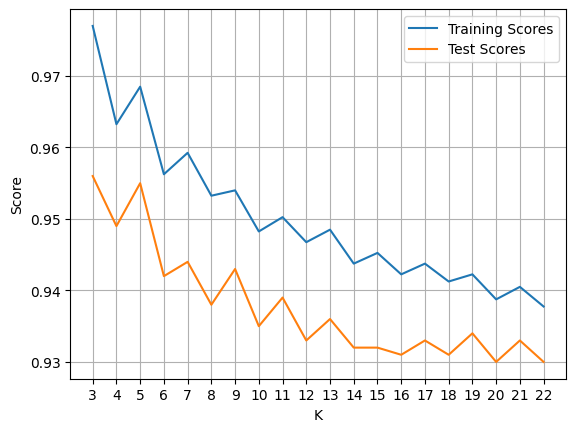

In [79]:
training_scores = []
test_scores = []
for k in range(3, 23):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(x_train, y_train.ravel())
    training_scores.append(knn_clf.score(x_train, y_train))
    test_scores.append(knn_clf.score(x_test, y_test))

plt.plot(range(3, 23), training_scores, label='Training Scores')
plt.plot(range(3, 23), test_scores, label='Test Scores')
plt.legend()
plt.grid()
plt.xlabel('K')
plt.ylabel('Score')
plt.xticks(ticks=range(3, 23))
plt.show()

We can see that score of `k = 3` is the maximum socre and differnece between train and test score is about 2%. Now let's get `k` via `GridSearchCV`:

### `GridSearchCV` for KNN

In [80]:
param_grid_knn = {
    'n_neighbors' : range(3, 23)
}
grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    scoring='accuracy',
    cv=5,
    verbose=0
)
grid_search_knn.fit(x_train, y_train.ravel())
print(grid_search_knn.best_params_)

{'n_neighbors': 3}


`GridSearchCV` also gives `k = 3` as the best value for `k`.

### Add dimension to features

In [81]:
def add_dimension_knn(data, d=2):
    score = 0.956
    columns = []
    scores = []
    df = pd.DataFrame(data).drop(
        ['Personal Loan', 'ZIP Code', 'Latitude', 'Longitude', 'Country'],
        axis=1
    )
    for col in df.columns:
        df[f'{col} ** {d}'] = df[col] ** d
        x = df.values
        y = data['Personal Loan'].values
        x_normalized = min_max_scaler(x)
        x_train, x_test, y_train, y_test = train_test_split(
            x_normalized,
            y,
            test_size=0.2,
            random_state=42
        )

        knn_clf = KNeighborsClassifier(n_neighbors=3)
        knn_clf.fit(x_train, y_train.ravel())
        y_pred_knn = knn_clf.predict(x_test)
        knn_score = metrics.accuracy_score(y_test, y_pred_knn)
        if knn_score > score:
            columns.append(f'{col} ** {d}')
            scores.append(knn_score)
            score = knn_score
        else:
            df.drop([f'{col} ** {d}'], axis=1, inplace=True)

    score_col_df = pd.DataFrame({
        'Columns' : columns,
        'Scores' : scores
    })
    return score_col_df, df

knn_scores, df_add_dim_knn = add_dimension_knn(encoded_data, 2)

In [82]:
knn_scores

Columns  Scores
0    Income ** 2   0.957
1    Family ** 2   0.959
2  Mortgage ** 2   0.960

In [83]:
df_add_dim_knn

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1      49       4    1.6          1         0   
1      45          19      34       3    1.5          1         0   
2      39          15      11       1    1.0          1         0   
3      35           9     100       1    2.7          2         0   
4      35           8      45       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3      40       1    1.9          3         0   
4996   30           4      15       4    0.4          1        85   
4997   63          39      24       2    0.3          3         0   
4998   65          40      49       3    0.5          2         0   
4999   28           4      83       3    0.8          1         0   

      Securities Account  CD Account  Online  CreditCard  County or State  \
0                      1           0       0           0                2   
1                      1           0       0           0                2   
2                      0           0       0           0                3   
3                      0           0       0           0                4   
4                      0           0       0           1                2   
...                  ...         ...     ...         ...              ...   
4995                   0           0       1           0               15   
4996                   0           0       1           0                5   
4997                   0           0       0           0                7   
4998                   0           0       1           0                2   
4999                   0           0       1           1               15   

      Income ** 2  Family ** 2  Mortgage ** 2  
0            2401           16              0  
1            1156            9              0  
2             121            1              0  
3           10000            1              0  
4            2025           16              0  
...           ...          ...            ...  
4995         1600            1              0  
4996          225           16           7225  
4997          576            4              0  
4998         2401            9              0  
4999         6889            9              0  

[5000 rows x 15 columns]

In [84]:
df_add_dim_knn[
    'Income2 * Family2'
] = df_add_dim_knn['Income ** 2'] * df_add_dim_knn['Family ** 2']
df_add_dim_knn[
    'Income2 * Mortgage2'
] = df_add_dim_knn['Income ** 2'] * df_add_dim_knn['Mortgage ** 2']
df_add_dim_knn[
    'Family2 * Mortgage2'
] = df_add_dim_knn['Family ** 2'] * df_add_dim_knn['Mortgage ** 2']

df_add_dim_knn[
    'Income2 * Family'
] = df_add_dim_knn['Income ** 2'] * df_add_dim_knn['Family']
df_add_dim_knn[
    'Income2 * Mortgage'
] = df_add_dim_knn['Income ** 2'] * df_add_dim_knn['Mortgage']
df_add_dim_knn[
    'Family2 * Mortgage'
] = df_add_dim_knn['Family ** 2'] * df_add_dim_knn['Mortgage']
df_add_dim_knn[
    'Family2 * Income'
] = df_add_dim_knn['Family ** 2'] * df_add_dim_knn['Income']
df_add_dim_knn[
    'Mortgage2 * Family'
] = df_add_dim_knn['Mortgage ** 2'] * df_add_dim_knn['Family']
df_add_dim_knn[
    'Mortgage2 * Income'
] = df_add_dim_knn['Mortgage ** 2'] * df_add_dim_knn['Income']

df_add_dim_knn[
    'Income * Family'
] = df_add_dim_knn['Income'] * df_add_dim_knn['Family']
df_add_dim_knn[
    'Income * Mortgage'
] = df_add_dim_knn['Income'] * df_add_dim_knn['Mortgage']
df_add_dim_knn[
    'Family * Mortgage'
] = df_add_dim_knn['Family'] * df_add_dim_knn['Mortgage']

In [85]:
df_add_dim_knn

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1      49       4    1.6          1         0   
1      45          19      34       3    1.5          1         0   
2      39          15      11       1    1.0          1         0   
3      35           9     100       1    2.7          2         0   
4      35           8      45       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3      40       1    1.9          3         0   
4996   30           4      15       4    0.4          1        85   
4997   63          39      24       2    0.3          3         0   
4998   65          40      49       3    0.5          2         0   
4999   28           4      83       3    0.8          1         0   

      Securities Account  CD Account  Online  ...  Family2 * Mortgage2  \
0                      1           0       0  ...                    0   
1                      1           0       0  ...                    0   
2                      0           0       0  ...                    0   
3                      0           0       0  ...                    0   
4                      0           0       0  ...                    0   
...                  ...         ...     ...  ...                  ...   
4995                   0           0       1  ...                    0   
4996                   0           0       1  ...               115600   
4997                   0           0       0  ...                    0   
4998                   0           0       1  ...                    0   
4999                   0           0       1  ...                    0   

      Income2 * Family  Income2 * Mortgage  Family2 * Mortgage  \
0                 9604                   0                   0   
1                 3468                   0                   0   
2                  121                   0                   0   
3                10000                   0                   0   
4                 8100                   0                   0   
...                ...                 ...                 ...   
4995              1600                   0                   0   
4996               900               19125                1360   
4997              1152                   0                   0   
4998              7203                   0                   0   
4999             20667                   0                   0   

      Family2 * Income  Mortgage2 * Family  Mortgage2 * Income  \
0                  784                   0                   0   
1                  306                   0                   0   
2                   11                   0                   0   
3                  100                   0                   0   
4                  720                   0                   0   
...                ...                 ...                 ...   
4995                40                   0                   0   
4996               240               28900              108375   
4997                96                   0                   0   
4998               441                   0                   0   
4999               747                   0                   0   

      Income * Family  Income * Mortgage  Family * Mortgage  
0                 196                  0                  0  
1                 102                  0                  0  
2                  11                  0                  0  
3                 100                  0                  0  
4                 180                  0                  0  
...               ...                ...                ...  
4995               40                  0                  0  
4996               60               1275                340  
4997               48                  0                  0  
4998              147                  0                  0  
4999              24

In [86]:
x_add_dim_knn = df_add_dim_knn.values
x_add_dim_knn_normalized = min_max_scaler(x_add_dim_knn)
x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(
    x_add_dim_knn_normalized,
    y,
    test_size=0.2,
    random_state=42
)

modified_knn_clf = KNeighborsClassifier(n_neighbors=3)
modified_knn_clf.fit(x_train_knn, y_train_knn.ravel())
y_modified_pred_knn = modified_knn_clf.predict(x_test_knn)
modified_knn_score = metrics.accuracy_score(y_test_knn, y_modified_pred_knn)
modified_knn_score

0.963

Adding new dimension would increase score by 0.7%.

## Testing new data

In [87]:
algorithms_score = pd.DataFrame({
    'Algorithm' : ['Logistic Regression', 'Naive Bayes', 'KNN'],
    'Score' : [modified_log_score, modified_gnb_score, modified_knn_score]
})
algorithms_score

Algorithm  Score
0  Logistic Regression  0.967
1          Naive Bayes  0.917
2                  KNN  0.963

In [88]:
id = 5071
age = 42
experience = 16
income = 30
zip_code = 92037
family = 3
ccavg = 1.2
education_level = 'Advanced'
mortgage = 0
securities_account = 1
cd_account = 0
online = 1
credit_card = 1
personal_loan = 0
education_encode = {
    'Undergrade' : 1,
    'Graduate' : 2,
    'Advanced' : 3
}
education = education_encode[education_level]

country, county, lat, lng = get_location_uszipcode(zip_code)
if not (country and county and lat and lng):
    country, county, lat, lng = get_location_geopy(zip_code)

In [89]:
new_row = pd.DataFrame([{'Age' : age,
                         'Experience' : experience,
                         'Income' : income,
                         'ZIP Code' : zip_code,
                         'Family' : family,
                         'CCAvg' : ccavg,
                         'Education' : education,
                         'Mortgage': mortgage,
                         'Personal Loan' : personal_loan,
                         'Securities Account' : securities_account,
                         'CD Account' : cd_account,
                         'Online' : online,
                         'CreditCard' : credit_card,
                         'Country' : country,
                         'County or State' : county,
                         'Latitude' : lat,
                         'Longitude' : lng,
                         }])
new_data = data.append(new_row)
encoded_county = county_encoder.get(county, None)

if encoded_county:
    encoded_new_data = new_data.replace(county_encoder)
else:
    county_encoder[county] = np.max(encoded_data['County or State']) + 1
    encoded_new_data = new_data.replace(county_encoder)

<ipython-input-89-8a6145937e19>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = data.append(new_row)


In [90]:
encoded_new_data

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1      49     91107       4    1.6          1         0   
1      45          19      34     90089       3    1.5          1         0   
2      39          15      11     94720       1    1.0          1         0   
3      35           9     100     94112       1    2.7          2         0   
4      35           8      45     91330       4    1.0          2         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4996   30           4      15     92037       4    0.4          1        85   
4997   63          39      24     93023       2    0.3          3         0   
4998   65          40      49     90034       3    0.5          2         0   
4999   28           4      83     92612       3    0.8          1         0   
0      42          16      30     92037       3    1.2          3         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  \
0                 0                   1           0       0           0   
1                 0                   1           0       0           0   
2                 0                   0           0       0           0   
3                 0                   0           0       0           0   
4                 0                   0           0       0           1   
...             ...                 ...         ...     ...         ...   
4996              0                   0           0       1           0   
4997              0                   0           0       0           0   
4998              0                   0           0       1           0   
4999              0                   0           0       1           1   
0                 0                   1           0       1           1   

            Country  County or State  Latitude  Longitude  
0     United States                2     34.16    -118.08  
1     United States                2     34.02    -118.29  
2     United States                3     37.87    -122.25  
3     United States                4     37.72    -122.44  
4     United States                2     34.25    -118.53  
...             ...              ...       ...        ...  
4996  United States                5     32.86    -117.24  
4997  United States                7     34.51    -119.29  
4998  United States                2     34.03    -118.40  
4999  United States               15     33.66    -117.83  
0     United States                5     32.86    -117.24  

[5001 rows x 17 columns]

### Logistic Regression

In [91]:
df_add_dim_log.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'County or State', 'Education ** 2'],
      dtype='object')

In [92]:
df_log_user = encoded_new_data.copy()
df_log_user['Education ** 2'] = df_log_user['Education'] ** 2
df_log_user

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1      49     91107       4    1.6          1         0   
1      45          19      34     90089       3    1.5          1         0   
2      39          15      11     94720       1    1.0          1         0   
3      35           9     100     94112       1    2.7          2         0   
4      35           8      45     91330       4    1.0          2         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4996   30           4      15     92037       4    0.4          1        85   
4997   63          39      24     93023       2    0.3          3         0   
4998   65          40      49     90034       3    0.5          2         0   
4999   28           4      83     92612       3    0.8          1         0   
0      42          16      30     92037       3    1.2          3         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  \
0                 0                   1           0       0           0   
1                 0                   1           0       0           0   
2                 0                   0           0       0           0   
3                 0                   0           0       0           0   
4                 0                   0           0       0           1   
...             ...                 ...         ...     ...         ...   
4996              0                   0           0       1           0   
4997              0                   0           0       0           0   
4998              0                   0           0       1           0   
4999              0                   0           0       1           1   
0                 0                   1           0       1           1   

            Country  County or State  Latitude  Longitude  Education ** 2  
0     United States                2     34.16    -118.08               1  
1     United States                2     34.02    -118.29               1  
2     United States                3     37.87    -122.25               1  
3     United States                4     37.72    -122.44               4  
4     United States                2     34.25    -118.53               4  
...             ...              ...       ...        ...             ...  
4996  United States                5     32.86    -117.24               1  
4997  United States                7     34.51    -119.29               9  
4998  United States                2     34.03    -118.40               4  
4999  United States               15     33.66    -117.83               1  
0     United States                5     32.86    -117.24               9  

[5001 rows x 18 columns]

In [93]:
x_user_input_log = pd.DataFrame(df_log_user).drop(
    ['Personal Loan', 'ZIP Code', 'Latitude', 'Longitude', 'Country'],
    axis=1
).values
y_user_input_log = df_log_user['Personal Loan'].values

x_normalized_user_input_log = min_max_scaler(x_user_input_log)
x_train_user_log = x_user_input_log[:4999]
y_train_user_log = y_user_input_log[:4999]
x_test_user_log = x_user_input_log[5000:]

In [94]:
modified_log_clf.fit(x_train_user_log, y_train_user_log)
y_pred_user_log = modified_log_clf.predict(x_test_user_log)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [95]:
print(f'With Logistic Regression, answer is : {y_pred_user_log[0]}')

With Logistic Regression, answer is : 0


### Naive Bayes

In [96]:
df_add_dim_gnb.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'County or State', 'Income ** 2', 'Family ** 2', 'Income2 * Family2',
       'Income2 * Family', 'Income * Family2', 'Income * Family'],
      dtype='object')

In [97]:
df_gnb_user = encoded_new_data.copy()

df_gnb_user['Income ** 2'] = df_gnb_user['Income'] ** 2
df_gnb_user['Family ** 2'] = df_gnb_user['Family'] ** 2
df_gnb_user[
    'Income2 * Family2'
] = df_gnb_user['Income ** 2'] * df_gnb_user['Family ** 2'] 
df_gnb_user[
    'Income2 * Family'
] = df_gnb_user['Income ** 2'] * df_gnb_user['Family']
df_gnb_user[
    'Income * Family2'
] = df_gnb_user['Income'] * df_gnb_user['Family ** 2']
df_gnb_user[
    'Income * Family'
] = df_gnb_user['Income'] * df_gnb_user['Family']
df_gnb_user

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1      49     91107       4    1.6          1         0   
1      45          19      34     90089       3    1.5          1         0   
2      39          15      11     94720       1    1.0          1         0   
3      35           9     100     94112       1    2.7          2         0   
4      35           8      45     91330       4    1.0          2         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4996   30           4      15     92037       4    0.4          1        85   
4997   63          39      24     93023       2    0.3          3         0   
4998   65          40      49     90034       3    0.5          2         0   
4999   28           4      83     92612       3    0.8          1         0   
0      42          16      30     92037       3    1.2          3         0   

      Personal Loan  Securities Account  ...        Country  County or State  \
0                 0                   1  ...  United States                2   
1                 0                   1  ...  United States                2   
2                 0                   0  ...  United States                3   
3                 0                   0  ...  United States                4   
4                 0                   0  ...  United States                2   
...             ...                 ...  ...            ...              ...   
4996              0                   0  ...  United States                5   
4997              0                   0  ...  United States                7   
4998              0                   0  ...  United States                2   
4999              0                   0  ...  United States               15   
0                 0                   1  ...  United States                5   

      Latitude Longitude  Income ** 2  Family ** 2  Income2 * Family2  \
0        34.16   -118.08         2401           16              38416   
1        34.02   -118.29         1156            9              10404   
2        37.87   -122.25          121            1                121   
3        37.72   -122.44        10000            1              10000   
4        34.25   -118.53         2025           16              32400   
...        ...       ...          ...          ...                ...   
4996     32.86   -117.24          225           16               3600   
4997     34.51   -119.29          576            4               2304   
4998     34.03   -118.40         2401            9              21609   
4999     33.66   -117.83         6889            9              62001   
0        32.86   -117.24          900            9               8100   

      Income2 * Family  Income * Family2  Income * Family  
0                 9604               784              196  
1                 3468               306              102  
2                  121                11               11  
3                10000               100              100  
4                 8100               720              180  
...                ...               ...              ...  
4996               900               240               60  
4997              1152                96               48  
4998              7203               441              147  
4999             20667               747              249  
0                 2700               270               90  

[5001 rows x 23 columns]

In [98]:
x_user_input_gnb = pd.DataFrame(df_gnb_user).drop(
    ['Personal Loan', 'ZIP Code', 'Latitude', 'Longitude', 'Country'],
    axis=1
).values
y_user_input_gnb = df_gnb_user['Personal Loan'].values

x_normalized_user_input_gnb = min_max_scaler(x_user_input_gnb)
x_train_user_gnb = x_user_input_gnb[:4999]
y_train_user_gnb = y_user_input_gnb[:4999]
x_test_user_gnb = x_user_input_gnb[5000:]

In [99]:
modified_gnb_clf.fit(x_train_user_gnb, y_train_user_gnb)
y_pred_user_gnb = modified_gnb_clf.predict(x_test_user_gnb)

In [100]:
print(f'With Gaussian Naive Bayes, answer is : {y_pred_user_gnb[0]}')

With Gaussian Naive Bayes, answer is : 0


### KNN

In [101]:
df_add_dim_knn.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'County or State', 'Income ** 2', 'Family ** 2', 'Mortgage ** 2',
       'Income2 * Family2', 'Income2 * Mortgage2', 'Family2 * Mortgage2',
       'Income2 * Family', 'Income2 * Mortgage', 'Family2 * Mortgage',
       'Family2 * Income', 'Mortgage2 * Family', 'Mortgage2 * Income',
       'Income * Family', 'Income * Mortgage', 'Family * Mortgage'],
      dtype='object')

In [102]:
df_knn_user = encoded_new_data.copy()

df_knn_user['Income ** 2'] = df_knn_user['Income'] ** 2
df_knn_user['Family ** 2'] = df_knn_user['Family'] ** 2
df_knn_user['Mortgage ** 2'] = df_knn_user['Mortgage'] ** 2

df_knn_user[
    'Income2 * Family2'
] = df_knn_user['Income ** 2'] * df_knn_user['Family ** 2']
df_knn_user[
    'Income2 * Mortgage2'
] = df_knn_user['Income ** 2'] * df_knn_user['Mortgage ** 2']
df_knn_user[
    'Family2 * Mortgage2'
] = df_knn_user['Family ** 2'] * df_knn_user['Mortgage ** 2']

df_knn_user[
    'Income2 * Family'
] = df_knn_user['Income ** 2'] * df_knn_user['Family']
df_knn_user[
    'Income2 * Mortgage'
] = df_knn_user['Income ** 2'] * df_knn_user['Mortgage']
df_knn_user[
    'Family2 * Mortgage'
] = df_knn_user['Family ** 2'] * df_knn_user['Mortgage']
df_knn_user[
    'Family2 * Income'
] = df_knn_user['Family ** 2'] * df_knn_user['Income']
df_knn_user[
    'Mortgage2 * Family'
] = df_knn_user['Mortgage ** 2'] * df_knn_user['Family']
df_knn_user[
    'Mortgage2 * Income'
] = df_knn_user['Mortgage ** 2'] * df_knn_user['Income']

df_knn_user[
    'Income * Family'
] = df_knn_user['Income'] * df_knn_user['Family']
df_knn_user[
    'Income * Mortgage'
] = df_knn_user['Income'] * df_knn_user['Mortgage']
df_knn_user[
    'Family * Mortgage'
] = df_knn_user['Family'] * df_knn_user['Mortgage']

df_knn_user

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1      49     91107       4    1.6          1         0   
1      45          19      34     90089       3    1.5          1         0   
2      39          15      11     94720       1    1.0          1         0   
3      35           9     100     94112       1    2.7          2         0   
4      35           8      45     91330       4    1.0          2         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4996   30           4      15     92037       4    0.4          1        85   
4997   63          39      24     93023       2    0.3          3         0   
4998   65          40      49     90034       3    0.5          2         0   
4999   28           4      83     92612       3    0.8          1         0   
0      42          16      30     92037       3    1.2          3         0   

      Personal Loan  Securities Account  ...  Family2 * Mortgage2  \
0                 0                   1  ...                    0   
1                 0                   1  ...                    0   
2                 0                   0  ...                    0   
3                 0                   0  ...                    0   
4                 0                   0  ...                    0   
...             ...                 ...  ...                  ...   
4996              0                   0  ...               115600   
4997              0                   0  ...                    0   
4998              0                   0  ...                    0   
4999              0                   0  ...                    0   
0                 0                   1  ...                    0   

      Income2 * Family  Income2 * Mortgage Family2 * Mortgage  \
0                 9604                   0                  0   
1                 3468                   0                  0   
2                  121                   0                  0   
3                10000                   0                  0   
4                 8100                   0                  0   
...                ...                 ...                ...   
4996               900               19125               1360   
4997              1152                   0                  0   
4998              7203                   0                  0   
4999             20667                   0                  0   
0                 2700                   0                  0   

      Family2 * Income  Mortgage2 * Family  Mortgage2 * Income  \
0                  784                   0                   0   
1                  306                   0                   0   
2                   11                   0                   0   
3                  100                   0                   0   
4                  720                   0                   0   
...                ...                 ...                 ...   
4996               240               28900              108375   
4997                96                   0                   0   
4998               441                   0                   0   
4999               747                   0                   0   
0                  270                   0                   0   

      Income * Family  Income * Mortgage  Family * Mortgage  
0                 196                  0                  0  
1                 102                  0                  0  
2                  11                  0                  0  
3                 100                  0                  0  
4                 180                  0                  0  
...               ...                ...                ...  
4996               60               1275                340  
4997               48                  0                  0  
4998              147                  0                  0  
4999              249             

In [103]:
x_user_input_knn = pd.DataFrame(df_knn_user).drop(
    ['Personal Loan', 'ZIP Code', 'Latitude', 'Longitude', 'Country'],
    axis=1
).values
y_user_input_knn = df_knn_user['Personal Loan'].values

x_normalized_user_input_knn = min_max_scaler(x_user_input_knn)
x_train_user_knn = x_user_input_knn[:4999]
y_train_user_knn = y_user_input_knn[:4999]
x_test_user_knn = x_user_input_knn[5000:]

In [104]:
modified_knn_clf.fit(x_train_user_knn, y_train_user_knn)
y_pred_user_knn = modified_knn_clf.predict(x_test_user_knn)

In [105]:
print(f'With KNN, answer is : {y_pred_user_knn[0]}')

With KNN, answer is : 0
